In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Normalizar imágenes (0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Añadir canal (necesario para Conv2D)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [6]:
# Modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 clases
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Entrenamiento
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.4807 - loss: 1.4167 - val_accuracy: 0.7148 - val_loss: 0.7593
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.7306 - loss: 0.7204 - val_accuracy: 0.7498 - val_loss: 0.6818
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.7587 - loss: 0.6430 - val_accuracy: 0.7681 - val_loss: 0.6482
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.7758 - loss: 0.5960 - val_accuracy: 0.7775 - val_loss: 0.5906
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.7941 - loss: 0.5576 - val_accuracy: 0.8054 - val_loss: 0.5428


In [9]:
# Evaluación
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en conjunto de prueba: {test_acc:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8084 - loss: 0.5415

Precisión en conjunto de prueba: 0.81


In [10]:
# Función para predecir una imagen y mostrarla
def predict_and_show(index):
    img = test_images[index]
    label = test_labels[index]

    prediction = model.predict(tf.expand_dims(img, 0))
    predicted_class = np.argmax(prediction)

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Real: {class_names[label]} / Predicho: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


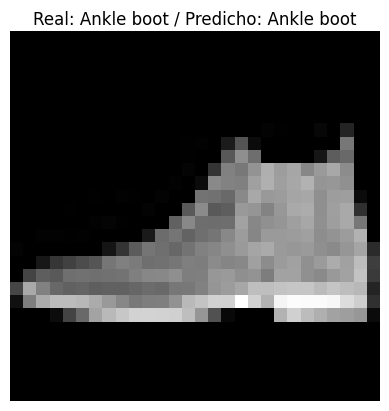

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


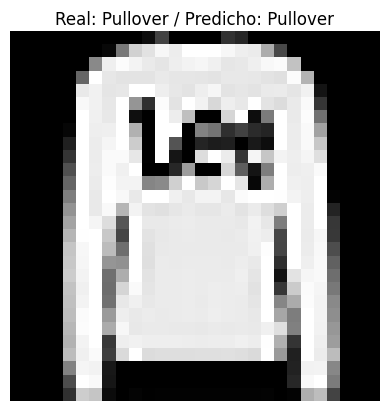

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


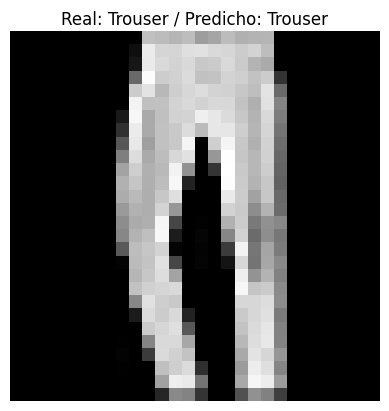

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


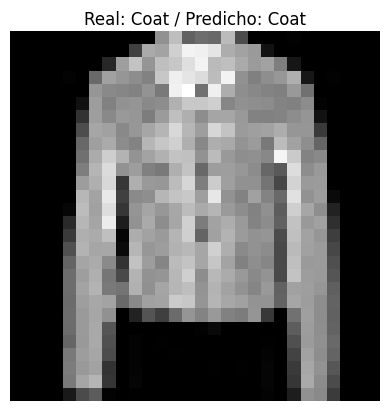

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


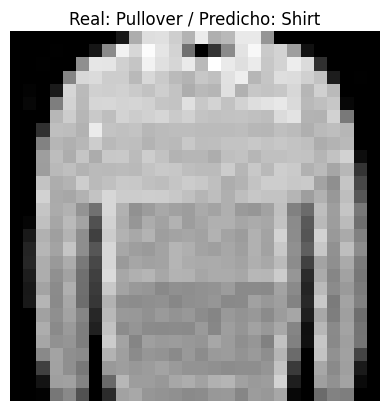

In [14]:
# Probar
for i in [0, 1, 5, 10, 20]:
    predict_and_show(i)
